In [ ]:
from google.colab.patches import cv2_imshow 
from google.colab import drive 
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Transformation to Frequency Domain 영상의 주파수 영역으로 변환

영상을 표현하고 해석하기 위해서 사용하는 영역은 주로 공간영역과 주파수 영역 2가지이다

1. 픽셀 단위의 공간 영역spatial domain의 표현 방식

2. 공간 영역에서 표현된 영상을 주파수 영역frequency domain으로 변환하는 방식

\

주파수 영역은 단위 시간에 몇 번의 변화가 일어났는지 표현하는 방법으로

영상 정보를 다른 영역으로 변환하여 표현하되, 

서로 직교하는 기저(sin,cosine)를 사용하여 표현해야만 영상 고유정보를 보전하여 표현 가능

푸리에 변환, 이산코사인변환, 웨이블릿 변환 등이 대표적이고

특히 푸리에 변환이 영상 필터링, 분석, 압축 등 여러 알고리즘에서 널리 쓰임

# 이산 푸리에 변환 Discrete Fourier Transform, DFT

푸리에 변환의 핵심은 임의의 어떤 함수는 주파수가 서로 다른 무한개의 조화함수harmonic으로 표현 될 수 있다고 전제함

시간temporal 또는 공간statial에서 정의된 신호를 시/공간 주파수 성분으로 분해

* 푸리에 급수와 푸리에 변환은 둘 다 공간 신호의 주파수 성분 해석하지만 -급수는 주기성 있는 신호를 무한 삼각함수 합으로 표현, -변환은 비주기성 신호에 사용

푸리에 변환으로 변환된 시/공간을 주파수/푸리에 공간이라 함

\

장점은 시간 영역의 신호의 주파수 성분, 진폭, 위상차 파악이 쉬움

\

푸리에 변환을 사용하면 실수부와 허수부로 나뉘어지며 따로 계산도 가능

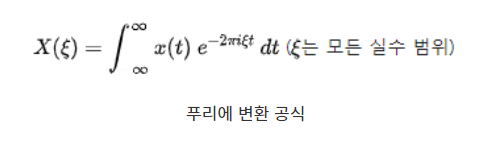

# 이산 푸리에 역변환 inverse Discrete Fourier Transform, IDFT

주파수 공간의 영상을 다시 픽셀 공간의 영상으로 변환시키는 역할

푸리에 변환 수식에서 지수승의 부호만 반대로 하면 된다

DFT 구현

In [ ]:
img = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/book_image/butterfly.bmp', 0)

# cv2.dft -> 이산푸리에 변환
dft = cv2.dft(np.float32(img), flags = cv2.DFT_COMPLEX_OUTPUT)
# DC성분이 중심으로 오도록 주파수 중심을 이동
dft_shift = np.fft.fftshift(dft)
# DFT 결과의 크기값에 로그 -> 확인 편하기 위한 기능
mag_dft = 20*np.log(cv2.magnitude(dft[:,:,0], dft[:,:,1]))
mag_dft_shift = 20*np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))

cv2_imshow(img)
cv2_imshow(mag_dft)
cv2_imshow(mag_dft_shift)

error: ignored

In [ ]:
img = cv2.imread('/content/gdrive/MyDrive/Colab Notebooks/book_image/butterfly.bmp', 0)

# cv2.dft -> 이산푸리에 변환. 가장 많이 활용되는 방식
# dft함수는 실수 영상을 입력받기에 실수로 전환해줘야함
dft = cv2.dft(np.float32(img), flags = cv2.DFT_COMPLEX_OUTPUT) # flags(수행 방식 결정)으로 cv2.DFT_COMPLEX_OUTPUT는 변환한 값을 줌
# DC성분이 중심으로 오도록 주파수 중심을 이동 -> 결과값이 중심에 오게 함
dft_shift = np.fft.fftshift(dft) # 주파수 재배열하여 0인 부분을 중심, 클수록 가장자리 위치하게함

# cv2.magnitude -> 2D벡터의 크기 계산
mag_dft = 20*np.log(cv2.magnitude(dft[:,:,0], dft[:,:,1])) # dft 결과의 크기값에 로그 -> 확인 편하기 위한 기능
mag_dft_shift = 20*np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1])) # dft_shift 결과의 크기값에 로그

cv2_imshow(img)
cv2_imshow(mag_dft)
cv2_imshow(mag_dft_shift)

error: ignored

IDFT 구현

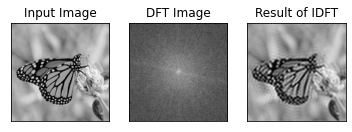

In [ ]:
img = cv2.imread('/content/gdrive/MyDrive/Image_Processing/butterfly.bmp',0)

dft = cv2.dft(np.float32(img), flags = cv2.DFT_COMPLEX_OUTPUT)

# DFT 변환
dft_shift = np.fft.fftshift(dft)
mag_dft=20*np.log(cv2.magnitude(dft[:,:,0],dft[:,:,1]))
mag_dft_shift=20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

# DC 성분을 중심으로 이동
rows, cols = img.shape
crow, ccol = int(rows/2), int(cols/2)

# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows, cols, 2), np.uint8) # 마스크 생성. 0으로 채움
mask[crow-30:crow+30, ccol-30:ccol+30] = 1 # 생성한 마스크의 센터 부분 값을 1로 변경
# 마스크를 사용해 이산푸리에 역변환
fshift = dft_shift*mask # DFT에 마스크 적용
f_ishift = np.fft.ifftshift(fshift)
# cv2.idft를 이용하여 이산푸리에 역변환
img_back = cv2.idft(f_ishift) # f_ishift의 DC를 원상복구하여 IDFT
img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])

plt.subplot(131), plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(mag_dft_shift, cmap = 'gray')
plt.title('DFT Image'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_back, cmap = 'gray')
plt.title('Result of IDFT'), plt.xticks([]), plt.yticks([])
plt.show()

# 고속 푸리에 변환 Fast Fourier Transform

고속 푸리에 변환 구현

In [ ]:
img = cv2.imread("/content/gdrive/MyDrive/Colab Notebooks/book_image/butterfly.bmp", 0)

fourier = np.fft.fft2(img)
fshift = np.fft.fftshift(fourier)

fourier_image = 20 * np.log(np.abs(fourier))

inverse_fourier = np.fft.ifft(fourier)
inverse_fourier_image = 20 * np.log(np.abs(inverse_fourier))
magnitude_spectrum = 20 * np.log(np.abs(fshift))


cv2_imshow(img)
cv2_imshow(fourier_image)
cv2_imshow(magnitude_spectrum)
cv2.imwrite('/content/gdrive/MyDrive/Colab Notebooks/book_image/buttyfly_fourier.bmp', fourier_image)
cv2.imwrite('/content/gdrive/MyDrive/Colab Notebooks/book_image/buttyfly_magnitude_spectrum.bmp', magnitude_spectrum)

IndexError: ignored

# Filters in Frequency Domain-Low-Pass Filtering 저주파대역 통과 필터링

주파수 공간 내에서 필터링

# Filters in Frequency Domain-High-Pass Filtering 고주파대역 통과 필터링